In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
with open("data/NE_3-14.pk", 'rb') as file:
    NE_data = pickle.load(file)

    
for n, dat in NE_data.items():
    print("N = {}".format(n))
    print("\tc0 = {}".format(dat[0]))
    for i in range(1, len(dat)):
        print("\tp{} = {}".format(i, dat[i]))

N = 3
	c0 = 0.28718707889821465
	p1 = 0.4641016151377231
	p2 = 0.2679491924341272
	p3 = 0.26794919242814974
N = 4
	c0 = 0.1684375244852117
	p1 = 0.4477365732247908
	p2 = 0.4248727049531577
	p3 = 0.12565488835943256
	p4 = 0.001735833462618963
N = 5
	c0 = 0.16967733261636536
	p1 = 0.3581907722466692
	p2 = 0.31558698265034996
	p3 = 0.19182306474683442
	p4 = 0.09677178087885936
	p5 = 0.037627399477286994
N = 6
	c0 = 0.13850629520939903
	p1 = 0.3265677622770902
	p2 = 0.297470322260759
	p3 = 0.23135992484029755
	p4 = 0.12249487676051264
	p5 = 0.021644028588676114
	p6 = 0.0004630852726644763
N = 7
	c0 = 0.12322710099769263
	p1 = 0.29457468849635626
	p2 = 0.2704791356644377
	p3 = 0.22475052400170645
	p4 = 0.1407314817155909
	p5 = 0.05808757884824096
	p6 = 0.010979491995179528
	p7 = 0.0003970992784880778
N = 8
	c0 = 0.10942605270273328
	p1 = 0.2709932771746697
	p2 = 0.25119786302012764
	p3 = 0.21761966098545643
	p4 = 0.15707594412837064
	p5 = 0.08223273337914656
	p6 = 0.01987765149136944
	p7 = 

In [3]:
ns, c0s = zip(*[(k, NE_data[k][0]) for k in NE_data.keys()])

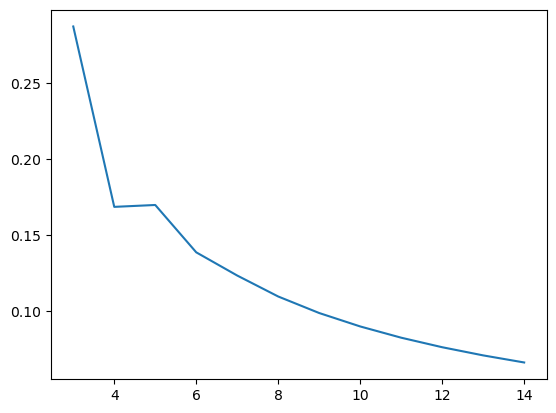

In [4]:
plt.plot(ns, c0s)

[ 0.05524277  0.2435399  -0.97387787]
[0.01188575 0.80385902 1.01754978]


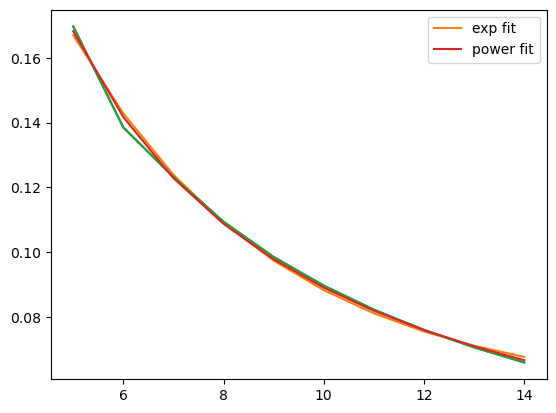

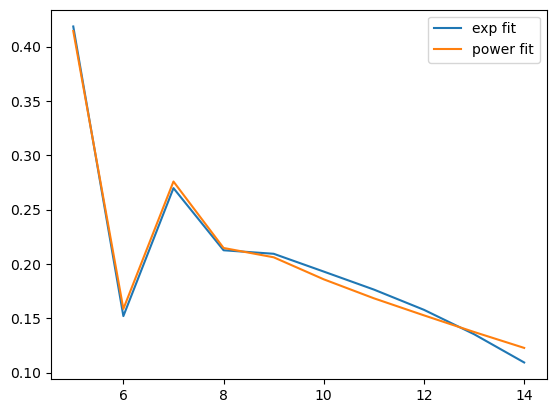

In [5]:
def f1(x, a, b, c):
    return a + np.exp(-b*x + c)

def f2(x, a, b, c):
    return a + b*np.power(x, -c)

popt, pcov = curve_fit(f1, ns[2:], c0s[2:])

fit1 = [f1(x, *popt) for x in ns[2:]]
print(popt)
plt.plot(ns[2:], c0s[2:])
plt.plot(ns[2:], fit1, label="exp fit")

popt, pcov = curve_fit(f2, ns[2:], c0s[2:])
fit2 = [f2(x, *popt) for x in ns[2:]]
print(popt)
plt.plot(ns[2:], c0s[2:])
plt.plot(ns[2:], fit2, label="power fit")
plt.legend()
plt.show()

resids1 = [(c - f) / c for f,c in zip(fit1, c0s)]
plt.plot(ns[2:], resids1, label="exp fit")

resids2 = [(c - f) / c for f,c in zip(fit2, c0s)]
plt.plot(ns[2:], resids2, label="power fit")
plt.legend()
plt.show()

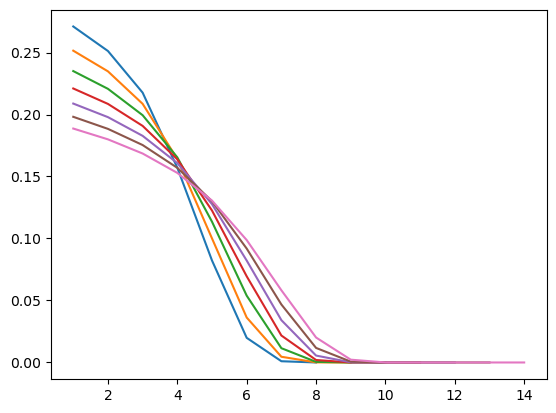

In [6]:
for i in range(8, 15):
    xs = [x for x in range(1, i+1)]
    ps = [p for p in NE_data[i][1:]]
    plt.plot(xs, ps)

In [8]:
with open("data/c0_data.pk", 'rb') as file:
    c0_data = pickle.load(file)

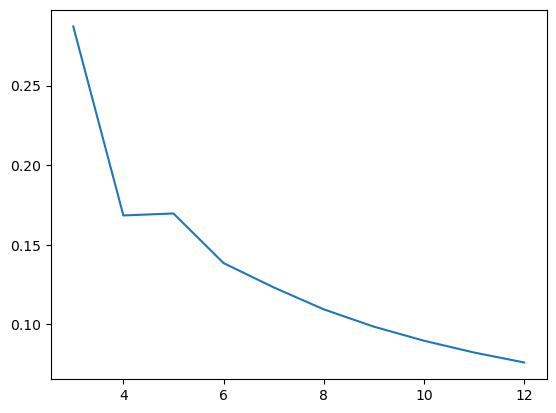

In [12]:
ns, cs = zip(*list(c0_data.items()))
plt.plot(ns, cs)